In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Step 2: Load your dataset
df = pd.read_csv(r"C:\Users\harec\Downloads\test_heart\Cardiovascular_Disease_Dataset.csv")  # Replace with your actual file path

# Step 3: Drop irrelevant features
df.drop('patientid', axis=1, inplace=True)

df.head()


,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
# Step 4: Handle missing values
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 10:
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Step 5: Range clipping based on medical limits
df['restingBP'] = df['restingBP'].clip(94, 200)
df['serumcholestrol'] = df['serumcholestrol'].clip(126, 564)
df['maxheartrate'] = df['maxheartrate'].clip(71, 202)
df['oldpeak'] = df['oldpeak'].clip(0, 6.2)

df['slope'] = df['slope'].replace(0, 1)

In [17]:
# Step 6: Encode categorical variables
cat_cols = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

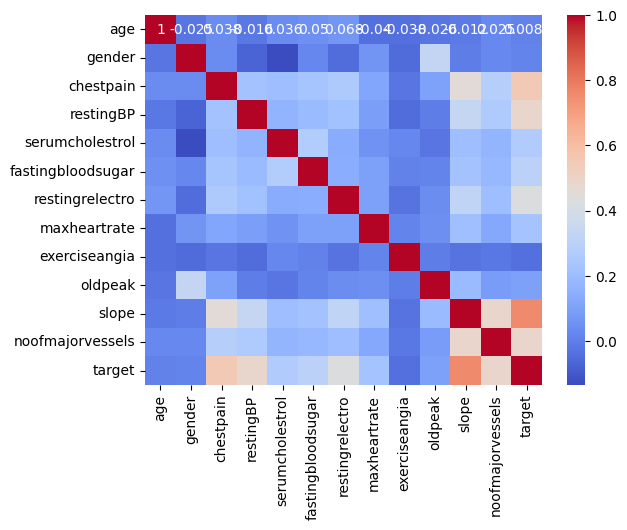

In [18]:
# Step 7: Correlation analysis (optional visualization)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [7]:
# Step 8: Split the dataset
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# Step 9: Build initial models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

c:\Users\harec\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
# Step 10: Hyperparameter tuning - Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [11]:
# Step 11: Hyperparameter tuning - XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}
grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid_xgb,
    cv=5,
    scoring='f1'
)
grid_xgb.fit(X_train, y_train)

c:\Users\harec\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\harec\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\harec\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\harec\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 1]},
             scoring='f1')

In [12]:
# Step 12: Evaluate models
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model("Decision Tree (Default)", dt_model)
evaluate_model("Tuned Decision Tree", grid_dt.best_estimator_)


Decision Tree (Default) Performance:
Accuracy: 0.97
Precision: 0.9741379310344828
Recall: 0.9741379310344828
F1 Score: 0.9741379310344828
Confusion Matrix:
 [[ 81   3]
 [  3 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        84
           1       0.97      0.97      0.97       116

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200


Tuned Decision Tree Performance:
Accuracy: 0.98
Precision: 0.9827586206896551
Recall: 0.9827586206896551
F1 Score: 0.9827586206896551
Confusion Matrix:
 [[ 82   2]
 [  2 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        84
           1       0.98      0.98      0.98       116

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98    

In [ ]:
evaluate_model("XGBoost (Default)", xgb_model)
evaluate_model("Tuned XGBoost", grid_xgb.best_estimator_)


XGBoost (Default) Performance:
Accuracy: 0.985
Precision: 0.991304347826087
Recall: 0.9827586206896551
F1 Score: 0.9870129870129869
Confusion Matrix:
 [[ 83   1]
 [  2 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.99      0.98      0.99       116

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200


Tuned XGBoost Performance:
Accuracy: 0.99
Precision: 0.9913793103448276
Recall: 0.9913793103448276
F1 Score: 0.9913793103448276
Confusion Matrix:
 [[ 83   1]
 [  1 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.99      0.99      0.99       116

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weigh

In [14]:
def user_input_prediction(model):
    print("\n--- Enter Patient Data ---")
    try:
        age = int(input("Age (in years): "))
        gender = int(input("Gender (0 = Female, 1 = Male): "))
        chestpain = int(input("Chest Pain Type (0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic): "))
        restingBP = int(input("Resting Blood Pressure (mm Hg): "))
        serumcholestrol = int(input("Serum Cholesterol (mg/dl): "))
        fastingbloodsugar = int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): "))
        restingrelectro = int(input("Resting ECG Result (0=normal, 1=ST-T abnormality, 2=LV hypertrophy): "))
        maxheartrate = int(input("Maximum Heart Rate Achieved: "))
        exerciseangia = int(input("Exercise Induced Angina (1=Yes, 0=No): "))
        oldpeak = float(input("Oldpeak (ST depression induced by exercise): "))
        slope = int(input("Slope of peak exercise ST segment (0=up, 1=flat, 2=down): "))
        noofmajorvessels = int(input("Number of major vessels colored by fluoroscopy (0-3): "))
        
        # Clipping values to maintain consistency
        restingBP = np.clip(restingBP, 94, 200)
        serumcholestrol = np.clip(serumcholestrol, 126, 564)
        maxheartrate = np.clip(maxheartrate, 71, 202)
        oldpeak = np.clip(oldpeak, 0, 6.2)

        input_data = pd.DataFrame([[
            age, gender, chestpain, restingBP, serumcholestrol,
            fastingbloodsugar, restingrelectro, maxheartrate,
            exerciseangia, oldpeak, slope, noofmajorvessels
        ]], columns=[
            'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
            'fastingbloodsugar', 'restingrelectro', 'maxheartrate',
            'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels'
        ])

        prediction = model.predict(input_data)[0]
        print("\n🔍 Prediction: Patient", "has heart disease 💔" if prediction == 1 else "does NOT have heart disease ❤️")

    except ValueError as e:
        print("Invalid input. Please enter numeric values only.")

# Call the function using the best model
user_input_prediction(grid_xgb.best_estimator_)  # Or use dt_model or grid_dt.best_estimator_



--- Enter Patient Data ---

🔍 Prediction: Patient has heart disease 💔
